<h1>Procesamiento de datos para detección de Fraude</h1>

<h2>Recoleccion, preparación y división de datos</h2>

In [1]:
#En primer lugar, importamos las librerías
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


<ul>
    <li>%matplotlib inline es una magic function que permite mostrar los gráficos en la celda de abajo facilitando la visualización</li>
    <li>pandas sirve para manipulacion y análisis de datos</li>
    <li>numpy sirve para calculos numéricos con arrays y matrices</li>
    <li>matplotlib.pyplot es para visualizaciones y gráficos</li>
    <li>seaborn tambien pero para visualizar datos estadisticos</li>
    <li>time para trabajar con funciones de tiempo</li>
</ul>

<h3>Recolección y visualización del dataset</h3>

<p>Leemos el dataset mediante el uso de la libreria pandas</p>

In [2]:
data = pd.read_csv('D:/Descargas/datasets/fraudTrain.csv')


<p>Ahora visualizaremos la cantidad de filas y columnas que tiene nuestro dataset</p>

In [3]:
print('La cantidad de filas es {} y de columnas es {}'.format(data.shape[0],data.shape[1]))

La cantidad de filas es 1296675 y de columnas es 23


<p>Ahora visualizaremos algunos datos del dataset</p>

In [4]:
data.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
216293,216293,2019-04-20 14:19:19,4810839835482794272,fraud_Heathcote LLC,shopping_net,3.74,Carolyn,Perez,F,433 Blake Roads Suite 967,...,36.7651,-94.0492,760,Production manager,1985-08-31,12ef6918d781f3d43bc4456424540d2a,1334931559,36.973220,-93.955542,0
674741,674741,2019-10-14 12:52:45,3533742182628021,fraud_Kub PLC,personal_care,17.66,Robert,Haynes,M,857 Aaron Circles Suite 398,...,32.8357,-79.8217,20478,Materials engineer,1997-06-04,8733fac6ebec435003b34f67a772ed90,1350219165,33.210620,-80.369753,0
35804,35804,2019-01-21 22:05:51,4279161831637,fraud_Kemmer-Buckridge,misc_pos,6.31,Lisa,Hendrix,F,35737 Kirby Fall Suite 409,...,40.0246,-79.6955,2303,Physiotherapist,1987-08-16,ed5ae9c0d9e1651d31d121083135e397,1327183551,40.599116,-79.821214,0
556940,556940,2019-08-25 18:15:41,213112402583773,fraud_Shields-Wunsch,health_fitness,123.03,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,6ca6c6e9353ff89d0dddb36d354f04e1,1345918541,33.287966,-82.734671,0
99622,99622,2019-02-28 08:14:43,4334230547694630,"fraud_Kerluke, Considine and Macejkovic",misc_net,57.92,Scott,Martin,M,7483 Navarro Flats,...,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,60a5d737da59bf733092cf321b3c79aa,1330416883,43.096103,-110.330991,0


Ahora vemos información sobre el dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<p>Veamos si hay valores nulos que deben ser eliminados mediante <b>isnull.sum()</b> donde cada celda del dataframe es true o false, true si es null, false si no lo es, luego con el metodo sum devolverá la cantidad de valores nulos en cada columna.</p>

In [6]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<p>Ahora se evaluará la cantidad de valores que son fraude y cuales no lo son.</p>

,Cantidad,Distribucion en porcentaje
No Fraude,1289169,99.421135
Fraude,7506,0.578865


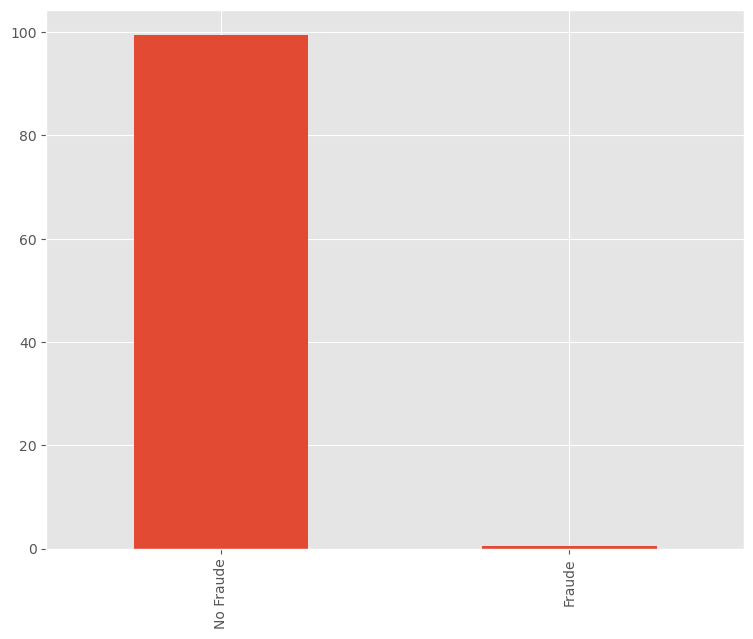

In [7]:
a=data['is_fraud'].value_counts().rename('Cantidad')
b=((data['is_fraud'].value_counts(normalize=True))*100).rename('Distribucion en porcentaje')
tabla=pd.concat([a,b],axis=1)
tabla.index=['No Fraude','Fraude']
tabla['Distribucion en porcentaje'].plot(kind='bar',figsize=(9,7))
tabla

<p>Como se puede observar, el dataset esta muy desbalanceado.</p>
<ul>
    <li>El 99,42% es no fraude</li>
    <li>Los casos positivos de fraude son solo el 0.57%</li>
</ul>

<p>Veamos la correlación entre los valores numéricos de la tabla utilizando un mapa de calor.</p>
<p>Este mapa nos ayudará a explorar la relación entre las variables de nuestro dataset, lo que nos ayudará a interpretar patrones y poder realizar un modelo estadístico más preciso.</p>

Text(0.5, 1.0, 'Mapa de calor de correlación')

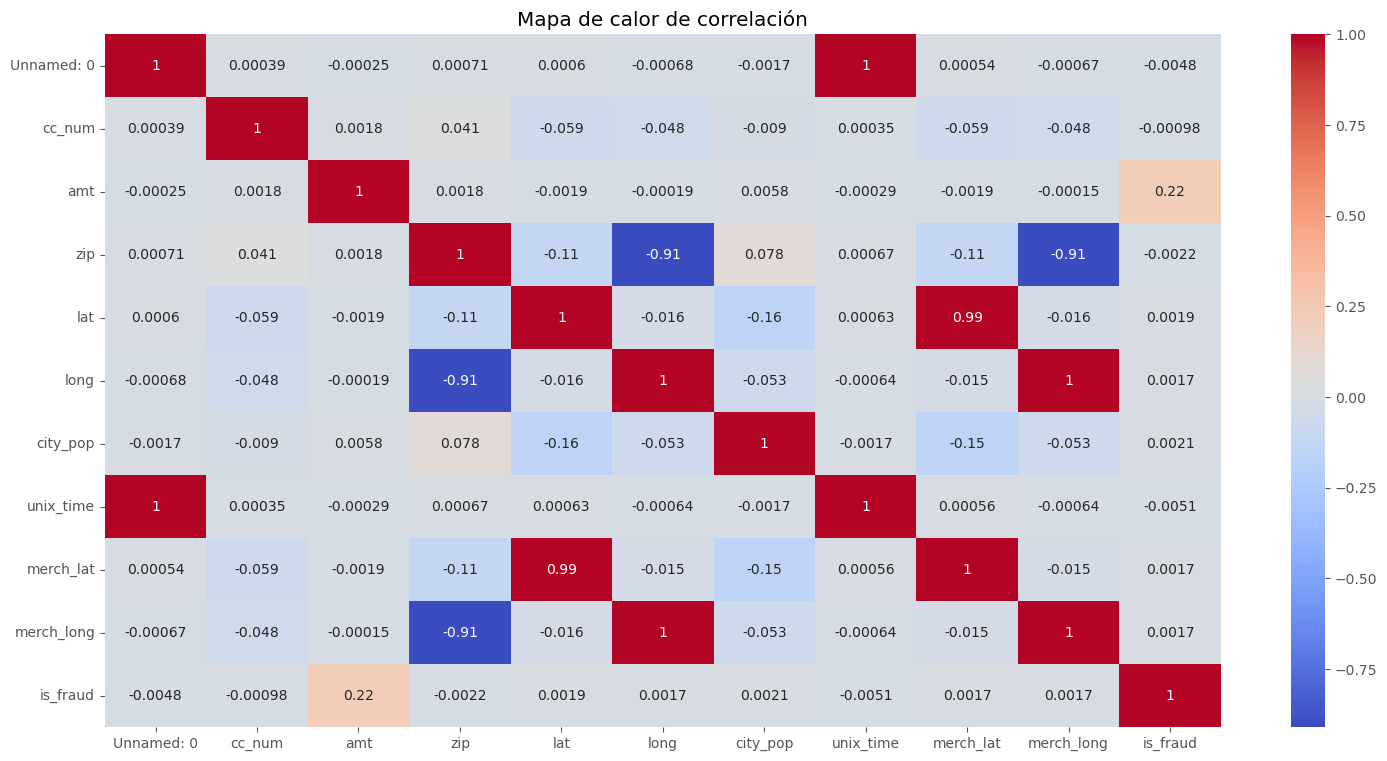

In [8]:
correlaciones=data.corr()
plt.figure(figsize=(18,9))
mapa_calor=sns.heatmap(data=correlaciones, cmap='coolwarm',annot=True)
plt.title('Mapa de calor de correlación')

<h2>Preparacion de datos (1)</h2>

<h4>Limpieza</h4>
<p>Hay que revisar los siguientes puntos:</p>
<ol>
    <li>Eliminar elementos duplicados</li>
    <li>Castear las variables que sean necesarias</li>
    <li>Chequear la cardinalidad de las columnas de categorias, es decir, la cantidad de valores unicos</li>
    <li>Eliminar las columnas redundates</li>
</ol>

<h5>Eliminar elementos duplicados</h5>

In [9]:
cantidad_duplicados= data.duplicated().sum()
print('Hay {} filas duplicadas'.format(cantidad_duplicados))

Hay 0 filas duplicadas


<p>Se puede observar que no hay elementos duplicados.<p>

<h5>Castear variables</h5>

In [10]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(2)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
Name: trans_date_trans_time, dtype: datetime64[ns]

In [11]:
data['dob']=pd.to_datetime(data['dob'])
data['dob'].head(2)

0   1988-03-09
1   1978-06-21
Name: dob, dtype: datetime64[ns]

<h5>Chequear la cardinalidad de las variables</h5>

In [12]:
columnas_categoricas=data.select_dtypes(include='object').columns
for col in columnas_categoricas:
    data[col]=data[col].str.lower().str.strip()
data[columnas_categoricas].nunique().sort_values()

gender             2
category          14
state             51
first            352
last             481
job              494
merchant         693
city             894
street           983
trans_num    1296675
dtype: int64

<h5>Eliminar columnas repetidas</h5>

<p>Podemos observar que hay columnas que no nos servirán tales como id, 'street', 'merchant' , 'job','first','last','trans_num'.</p>

In [13]:
columnas_a_eliminar=['Unnamed: 0', 'street','zip','first','last','trans_num','job','merchant']
data.drop(columnas_a_eliminar,axis=1, inplace=True)

<p>Observemos como queda el dataset ahora.</p>

In [14]:
data

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,f,moravian falls,nc,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,f,orient,wa,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,m,malad city,id,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,m,boulder,mt,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,m,doe hill,va,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,entertainment,15.56,m,hatch,ut,37.7175,-112.4777,258,1961-11-24,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,food_dining,51.70,m,tuscarora,md,39.2667,-77.5101,100,1979-12-11,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,food_dining,105.93,m,high rolls mountain park,nm,32.9396,-105.8189,899,1967-08-30,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,food_dining,74.90,m,manderson,sd,43.3526,-102.5411,1126,1980-08-18,1371816816,42.788940,-103.241160,0


<p>Analicemos nuevamente el mapa de calor entre las variables restantes.</p>

Text(0.5, 1.0, 'Mapa de calor de correlación')

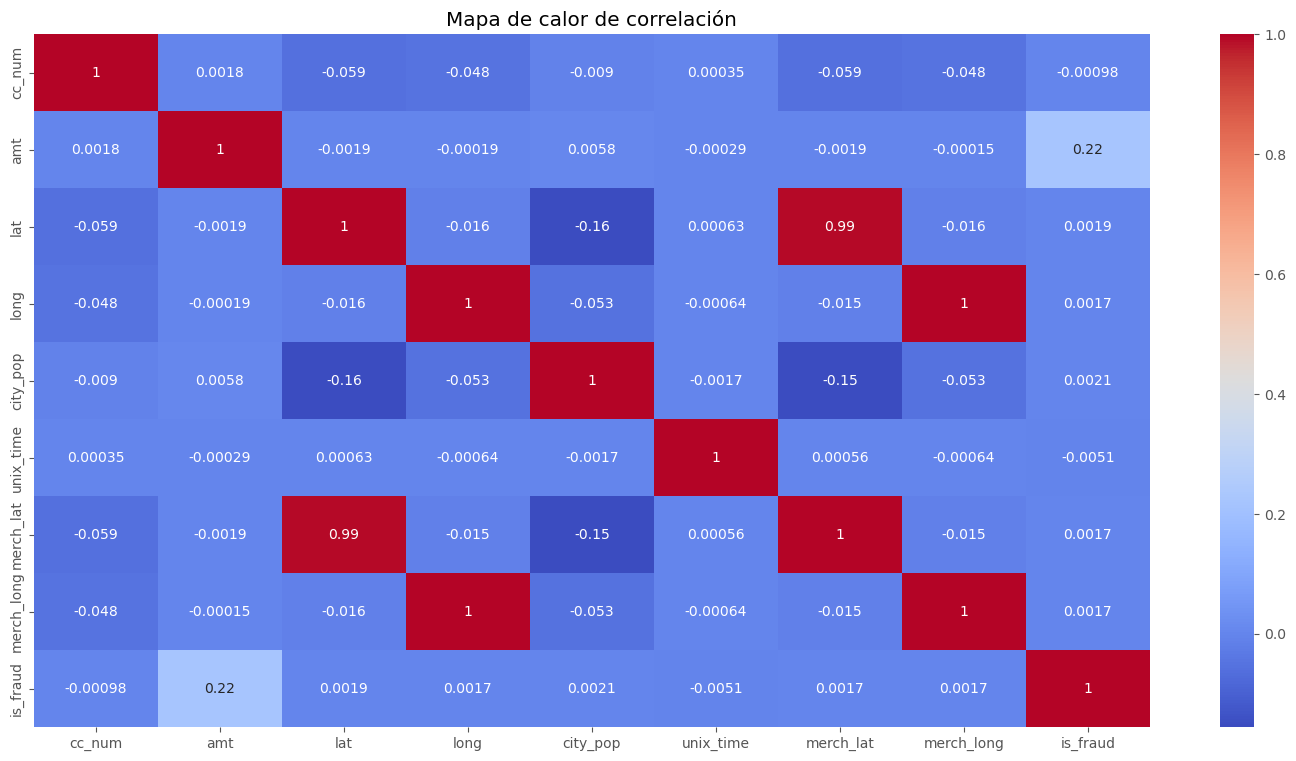

In [15]:
correlaciones=data.corr()
plt.figure(figsize=(18,9))
mapa_calor=sns.heatmap(data=correlaciones, cmap='coolwarm',annot=True)
plt.title('Mapa de calor de correlación')

<h3>Extracción de features</h3>
<p>Se procederá al desglose de features de ciertas columnas, tales como: </p>
<ul>
    <li>Trans_date_trans_time</li>
    <li>unix_time</li>
    <li>dob</li>
    <li>merchant lat-long</li>
    <li>lat-long del dueño de la tarjeta</li>
</ul>

<h4>Features de trans_date_trans_time</h4>
<ul>
    <li>trans_hora</li>
    <li>trans_mes</li>
    <li>trans_dia</li>
</ul>

In [16]:
#Extraemos la hora del componente trans_date
data['trans_hora']=data['trans_date_trans_time'].dt.hour
#Ahora veamos los valores posibles de hora
data['trans_hora'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [17]:
#Ahora extraigamos el mes y veamos los valores únicos correspondientes a dicha coluna
data['trans_mes']=data['trans_date_trans_time'].dt.month
data['trans_mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
#Ahora con los días de la semana
data['trans_dia']=data['trans_date_trans_time'].dt.day_name()
data['trans_dia'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

<h4>Features de unix_time</h4>
<p>En este caso se calculará el delay entre la transacción previa y la actual correspondiente a la misma tarjeta de credito.</p>
<p>Para eso, primero haremos un pequeño análisis de las tarjetas para luego agrupar las las transacciones por el número de tarjeta de crédito correspondiente a la columna <b>'cc_num'</b>.</p>
<p>Posteriormente calcularemos la diferencia entre las transacciones previas y actuales de cada tarjeta.</p>


In [19]:
data.groupby(['cc_num'])['cc_num'].count().describe().astype(int)

count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: cc_num, dtype: int32

<p>De lo anterior podemos inferir que hay un total de 983 tarjetas distintas, donde: </p>
<ul>
    <li>En promedio tiene 1319 transacciones</li>
    <li>El número con menor transacciones en 7.</li>
    <li>El mayor número es 3123</li>
</ul>

In [20]:
#Ahora ordenamos el dataframe teniendo en cuenta el unix_time de la transacción y el cc_num
data.sort_values(by=['cc_num','unix_time'],ascending=True,inplace=True)

In [21]:
#Ahora tomamos el tiempo actual de transacción y lo ubicamos en la columna unix_time_previo_trans desplazado un lugar
data['unix_time_previo_trans']=data.groupby(by=['cc_num'])['unix_time'].shift(1)

In [22]:
data.head(3)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hora,trans_mes,trans_dia,unix_time_previo_trans
1017,2019-01-01 12:47:15,60416207185,misc_net,7.27,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325422035,43.974711,-109.741904,0,12,1,Tuesday,NaN
2724,2019-01-02 08:44:57,60416207185,gas_transport,52.94,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325493897,42.018766,-109.044172,0,8,1,Wednesday,1.325422e+09
2726,2019-01-02 08:47:36,60416207185,gas_transport,82.08,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325494056,42.961335,-109.157564,0,8,1,Wednesday,1.325494e+09


In [23]:
#Las primeras transacciones tienen valores nulos/vacios en dicha columna, 
#tomaremos el tiempo de transaccion actual y le restaremos un dia en segundos
data['unix_time_previo_trans'].fillna(data['unix_time']-86400, inplace=True)

In [24]:
#Ahora calculamos la diferencia 
#Para poder sacar la notacion cientifica
data.head(3)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hora,trans_mes,trans_dia,unix_time_previo_trans
1017,2019-01-01 12:47:15,60416207185,misc_net,7.27,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325422035,43.974711,-109.741904,0,12,1,Tuesday,1.325336e+09
2724,2019-01-02 08:44:57,60416207185,gas_transport,52.94,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325493897,42.018766,-109.044172,0,8,1,Wednesday,1.325422e+09
2726,2019-01-02 08:47:36,60416207185,gas_transport,82.08,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325494056,42.961335,-109.157564,0,8,1,Wednesday,1.325494e+09


In [25]:
data['delay_entre_trans']=(data['unix_time']-data['unix_time_previo_trans'])//60
data.head(3)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hora,trans_mes,trans_dia,unix_time_previo_trans,delay_entre_trans
1017,2019-01-01 12:47:15,60416207185,misc_net,7.27,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325422035,43.974711,-109.741904,0,12,1,Tuesday,1.325336e+09,1440.0
2724,2019-01-02 08:44:57,60416207185,gas_transport,52.94,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325493897,42.018766,-109.044172,0,8,1,Wednesday,1.325422e+09,1197.0
2726,2019-01-02 08:47:36,60416207185,gas_transport,82.08,f,fort washakie,wy,43.0048,-108.8964,1645,1986-02-17,1325494056,42.961335,-109.157564,0,8,1,Wednesday,1.325494e+09,2.0


<h4>Features de dob</h4>
<p>En este caso queremos ver la edad de los dueños/usuario de las tarjetas.</p>
<p>Para eso calculamos la resta entre el tiempo de transaccion <b>trans_date_trans_time</b> y <b>dob</b>.</p>

In [26]:
data['edad_usuario']=((data['trans_date_trans_time']-data['dob']).dt.total_seconds())/(365*24*60*60)
data[['edad_usuario']]

,edad_usuario
1017,32.894610
2724,32.896889
2726,32.896894
2882,32.897333
2907,32.897395
...,...
1294934,64.492818
1295369,64.493229
1295587,64.493470
1296206,64.494072


<h4>Features de la latitud y longitud del merchant y del usuario de la tarjeta</h4>
<p>Para esto tenemos que hacer las siguientes cosas:</p>
<ul>
    <li>La distancia de latitud entre la localizacion del comprador y del merchant.</li>
    <li>La distancia de longitud entre la localización del comprador y del mercant.</li>
    <li>La distancia de latitud entre la localización del merchant actual y el anterior.</li>
    <li>La distancia de longitud entre la localización del merchant actual y el anterior.</li>
</ul>

In [27]:
#calculemos la distancia de latitud entre la localización entre el comprador y el merchant
data['dif_lat_comprador_merch']=(data['lat']-data['merch_lat']).abs()

In [28]:
#Ahora calculamos la distancia de longitud entre la localizacion entre el comprador y el merchant
data['dif_long_comprador_merch']=(data['long']-data['merch_long']).abs()

In [29]:
#Ahora hay que calcular la distancia de latitud entre la localización del merchant actual y el previo
#Hay que hacer un trabajo similar al del las tarjetas y el unix_time
data['lat_previo_merch']=data.groupby(by='cc_num')['merch_lat'].shift(1)
data['long_previo_merch']=data.groupby(by='cc_num')['merch_long'].shift(1)
data[['cc_num','unix_time','unix_time_previo_trans','merch_lat','lat_previo_merch','merch_long','long_previo_merch']].head(3)

,cc_num,unix_time,unix_time_previo_trans,merch_lat,lat_previo_merch,merch_long,long_previo_merch
1017,60416207185,1325422035,1.325336e+09,43.974711,NaN,-109.741904,NaN
2724,60416207185,1325493897,1.325422e+09,42.018766,43.974711,-109.044172,-109.741904
2726,60416207185,1325494056,1.325494e+09,42.961335,42.018766,-109.157564,-109.044172


In [30]:
#Ahora tenemos que llenar los valores nulos de las primeras transacciones
data['lat_previo_merch'].fillna(data['merch_lat'],inplace=True)
data['long_previo_merch'].fillna(data['merch_long'],inplace=True)

In [31]:
#Luego si calculamos las diferencias
data['dif_lat_prev_merch']=(data['merch_lat']-data['lat_previo_merch']).abs()
data['dif_long_prev_merch']=(data['merch_long']-data['long_previo_merch']).abs()
data[['dif_lat_prev_merch','dif_long_prev_merch']].head(3)

,dif_lat_prev_merch,dif_long_prev_merch
1017,0.000000,0.000000
2724,1.955945,0.697732
2726,0.942569,0.113392


<h3>Eliminacion de features o columnas redundantes</h3>
<p>Debido al procesamiento que hicimos anteriormente, han quedado columnas que sobran, entonces las eliminaremos. Entre ellas están: </p>
<ul>
    <li>trans_date_trans_time (desglosada)</li>
    <li>cc_num</li>
    <li>unix_time (desglosada)</li>
    <li>dob</li>
    <li>unix_time_previo_trans (solo la necesitabamos para calcular el delay entre transacciones)</li>
    <li>lat</li>
    <li>long</li>
    <li>merch_lat</li>
    <li>merch_long</li>
    <li>lat_previo_merch</li>
    <li>long_previo_merch</li>
    <li>city</li>
</ul>

In [32]:
list(data.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_hora',
 'trans_mes',
 'trans_dia',
 'unix_time_previo_trans',
 'delay_entre_trans',
 'edad_usuario',
 'dif_lat_comprador_merch',
 'dif_long_comprador_merch',
 'lat_previo_merch',
 'long_previo_merch',
 'dif_lat_prev_merch',
 'dif_long_prev_merch']

In [33]:
#Juntamos todas las columnas en una lsita para eliminarlas

columnas_a_eliminar2=['trans_date_trans_time','cc_num','unix_time','dob','unix_time_previo_trans','lat','long','merch_lat','merch_long',
                     'lat_previo_merch','long_previo_merch','city']
#ahora eliminamos mediante drop
data.drop(columnas_a_eliminar2, axis=1,inplace=True)
#arreglamos nuestro índice 
data.reset_index(drop=True,inplace=True)



In [34]:
list(data.columns)

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'trans_hora',
 'trans_mes',
 'trans_dia',
 'delay_entre_trans',
 'edad_usuario',
 'dif_lat_comprador_merch',
 'dif_long_comprador_merch',
 'dif_lat_prev_merch',
 'dif_long_prev_merch']

<h2>Segundo análisis</h2>
<p>Ahora realizaremos una segunda exploración de los datos ya una vez trabajados en ellos.</p>

<h3>Distribucion de fraudes y no fraudes</h3>

,Cantidad,Distribucion en porcentaje
No Fraude,1289169,99.421135
Fraude,7506,0.578865


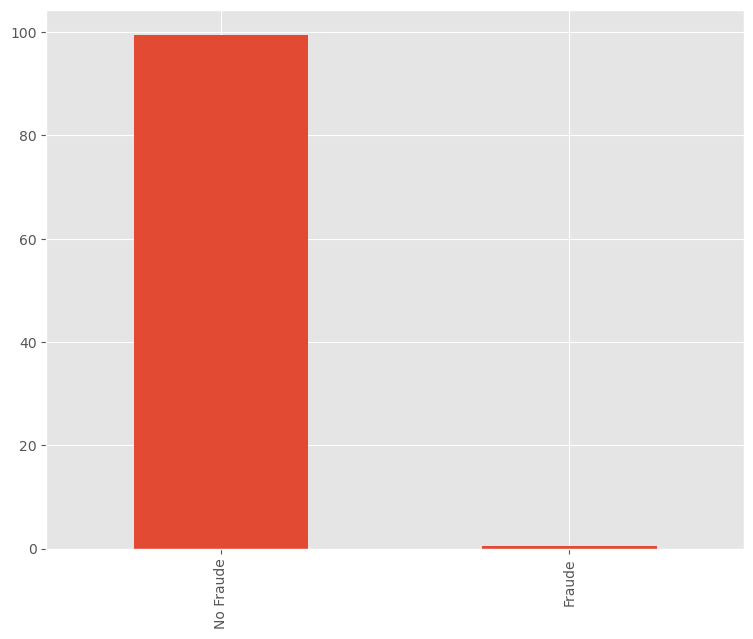

In [35]:
a=data['is_fraud'].value_counts().rename('Cantidad')
b=((data['is_fraud'].value_counts(normalize=True))*100).rename('Distribucion en porcentaje')
tabla=pd.concat([a,b],axis=1)
tabla.index=['No Fraude','Fraude']
tabla['Distribucion en porcentaje'].plot(kind='bar',figsize=(9,7))
tabla

<h3>Mapa de correlación entre los valores numéricos</h3>

Text(0.5, 1.0, 'Mapa de calor de correlación')

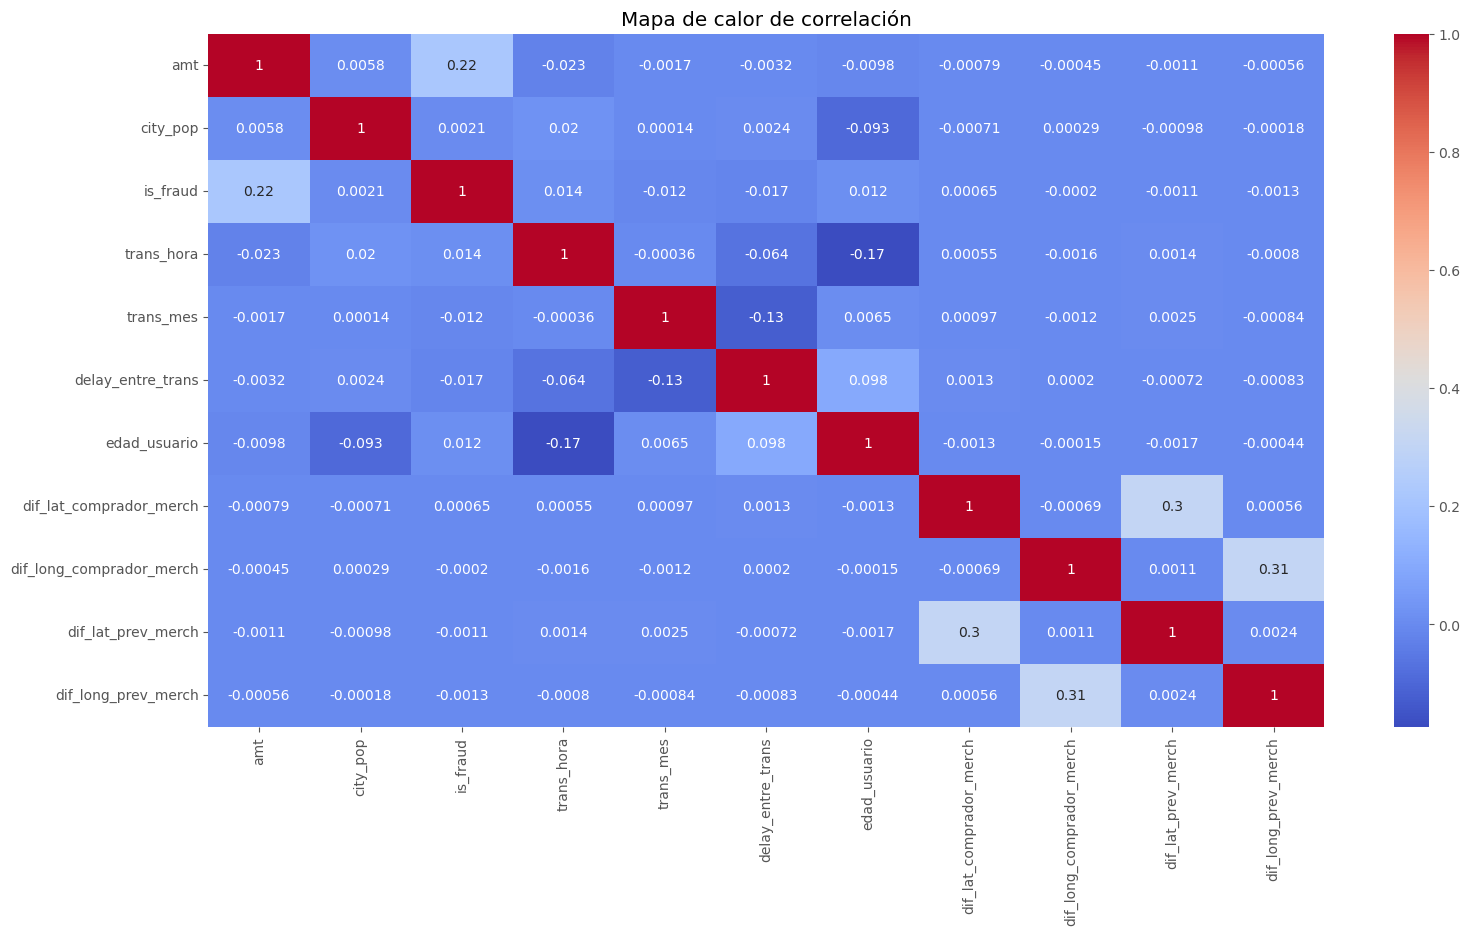

In [36]:
correlaciones3=data.corr()
plt.figure(figsize=(18,9))
mapa_calor3=sns.heatmap(data=correlaciones3, cmap='coolwarm',annot=True)
plt.title('Mapa de calor de correlación')

<h3>Nuevos análisis</h3>
<p>Para hacerlo más rápido dividiremos el dataset en 3.</p>
</p>Primero haremos una copia del dataset obtenido, haremos uno donde haya solo fraudes y otro sin fraudes.</p>

In [37]:
total_trans=data.copy()
normal=total_trans[data['is_fraud']==0]
fraudes=total_trans[data['is_fraud']==1]

def tabla_estadisticas(variable):
    cant_normal=((normal[variable].value_counts(normalize=True))*100).rename('normal')
    cant_fraude=((fraudes[variable].value_counts(normalize=True))*100).rename('fraude')
    tabla=pd.concat([cant_normal,cant_fraude],axis=1)
    return tabla

def tabla_clase(variable):
    tabla=total_trans.groupby('is_fraud')[variable].describe()
    return tabla

<h4>Por genero</h4>

,normal,fraude
f,54.773889,49.760192
m,45.226111,50.239808


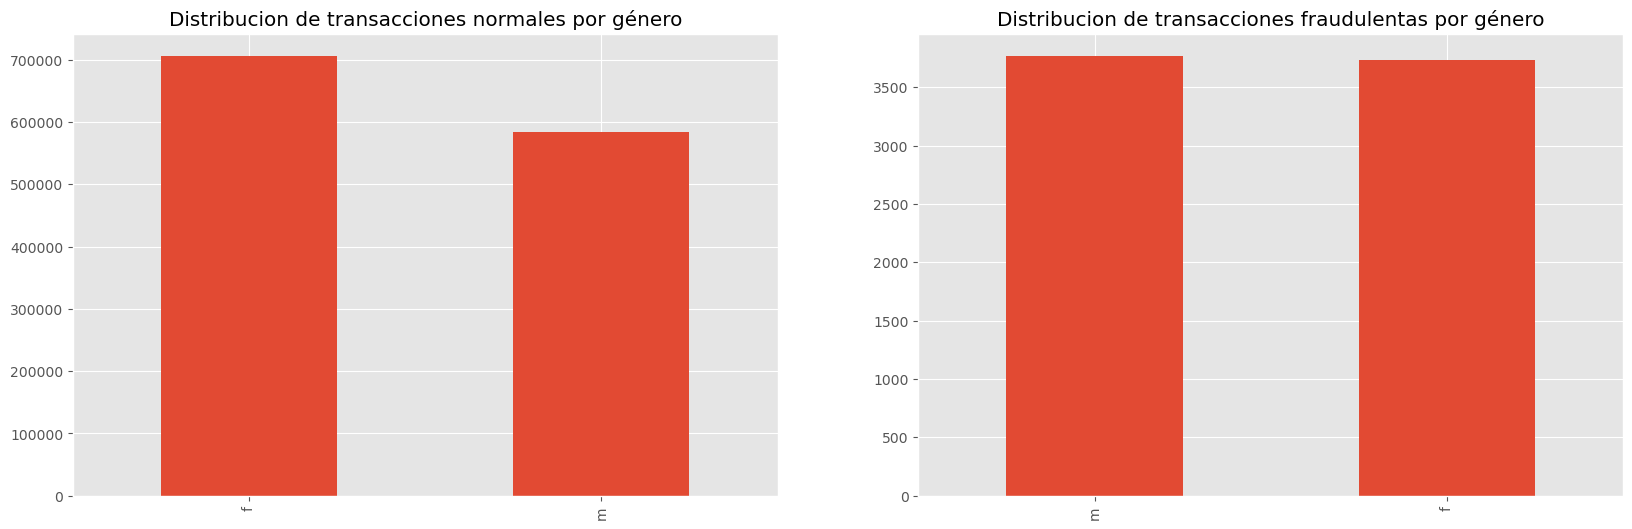

In [38]:
#grafica de transacciones normales
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind='bar')
plt.title('Distribucion de transacciones normales por género')

plt.subplot(1,2,2)
fraudes['gender'].value_counts().plot(kind='bar')
plt.title('Distribucion de transacciones fraudulentas por género')

#tabla de proporciones
tabla_estadisticas('gender')

<h4>Por edad</h4>

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,45.511960,17.398818,13.0,32.0,43.0,57.0,95.0
1,7506.0,48.321609,18.864543,14.0,33.0,47.0,60.0,93.0


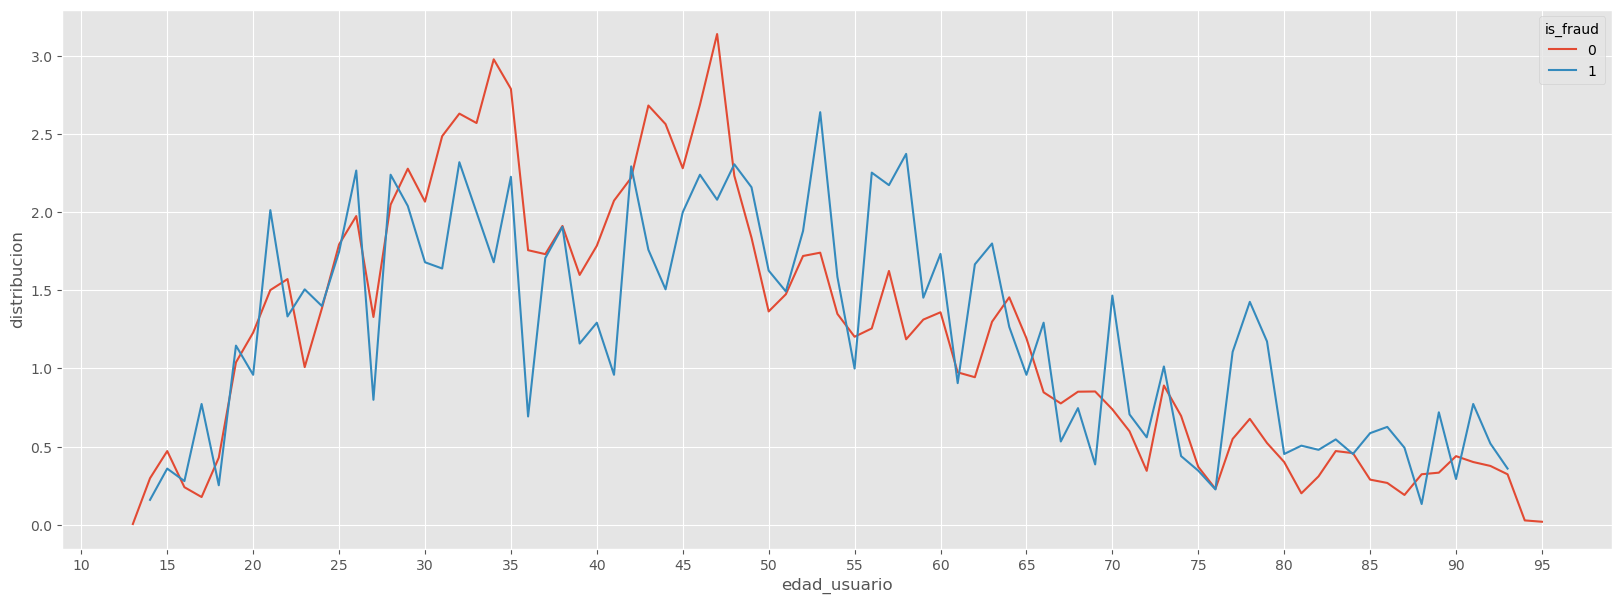

In [39]:
plt.figure(figsize=[20,7])
total_trans['edad_usuario']=total_trans['edad_usuario'].astype(int)
distribucion= ((total_trans.groupby('is_fraud')['edad_usuario'].value_counts(normalize=True)*100).rename('distribucion')).reset_index()
sns.lineplot(data=distribucion,x='edad_usuario',y='distribucion',hue='is_fraud')
plt.xticks(np.arange(10,100,5))
tabla_clase('edad_usuario')

<h4>Por cantidades</h4>

In [40]:
tabla_clase('amt')

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


<p>El promedio de transacciones falsas es de 531 y el normal es de 67.</p>
<p>Las transacciones fraudulentas se concentran en los $390.</p>

<h4>Por horas</h4>

([<matplotlib.axis.XTick at 0x13a094cb3a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

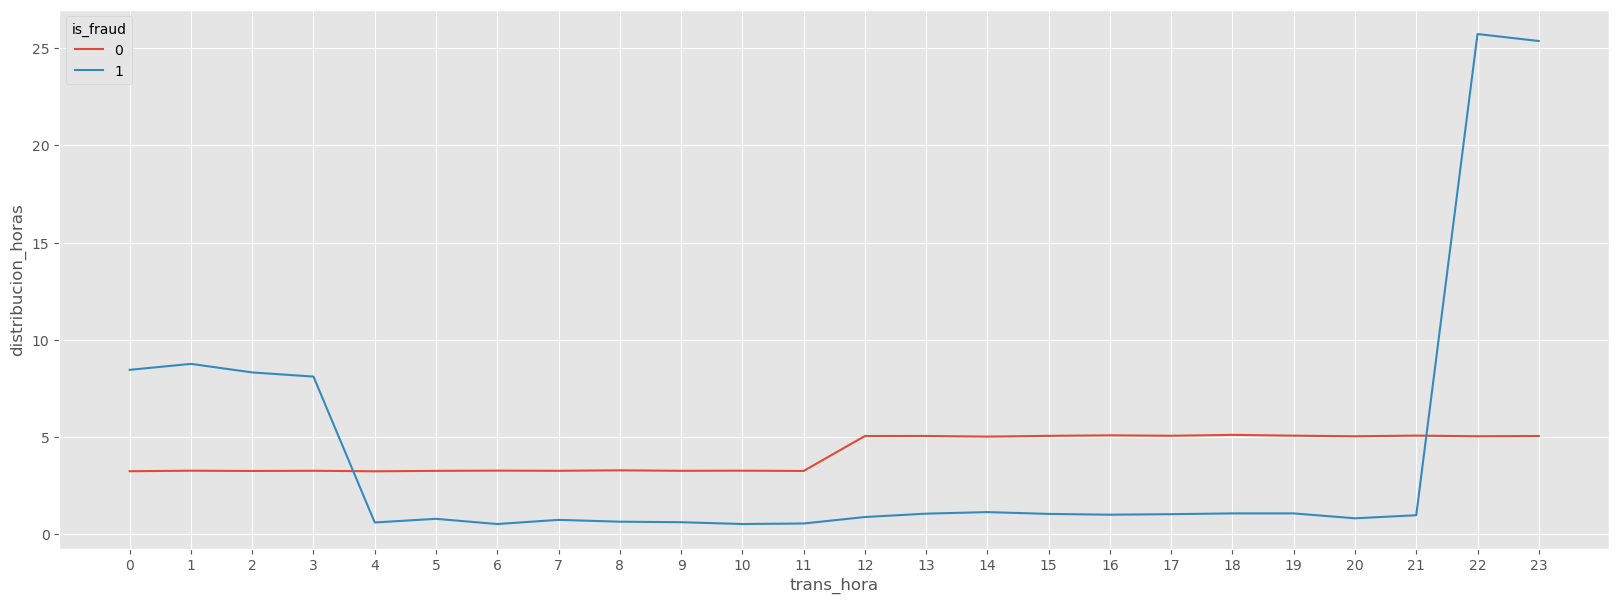

In [41]:
plt.figure(figsize=[20,7])
distribucion_en_horas= ((total_trans.groupby('is_fraud')['trans_hora'].value_counts(normalize=True)*100).rename('distribucion_horas')).reset_index()
sns.lineplot(data=distribucion_en_horas,x='trans_hora',y='distribucion_horas',hue='is_fraud')
plt.xticks(np.arange(0,24,1))


<p>Se puede observar que la mayoria de las transacciones fraudulentas entre las 21 y las 4.</p>

<h4>Delay entre transacciones</h4>

In [42]:
tabla_clase('delay_entre_trans')

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,542.631735,789.894813,0.0,101.0,277.0,673.00,22357.0
1,7506.0,365.552225,612.956650,0.0,25.0,84.0,509.75,14417.0


<p>En transacciones de fraude son más rápidas que las normales.</p>

<h4>Distancia de latitud y longitud entre el cliente y el merchant</h4>

In [43]:
tabla_clase('dif_lat_comprador_merch')

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,0.500249,0.288584,0.000000,0.250397,0.500516,0.750061,0.999999
1,7506.0,0.502739,0.286166,0.000225,0.253632,0.507158,0.746795,0.999968


<p>Se puede observar que no hay mucha diferencia entre ambos tipos de casos.</p>

In [44]:
tabla_clase('dif_long_comprador_merch')

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,0.500341,0.288866,0.000000,0.249968,0.500321,0.750566,0.999997
1,7506.0,0.499577,0.289625,0.000438,0.248196,0.496840,0.745902,0.999914


<p>Tampoco se observan diferencias relevantes.</p>

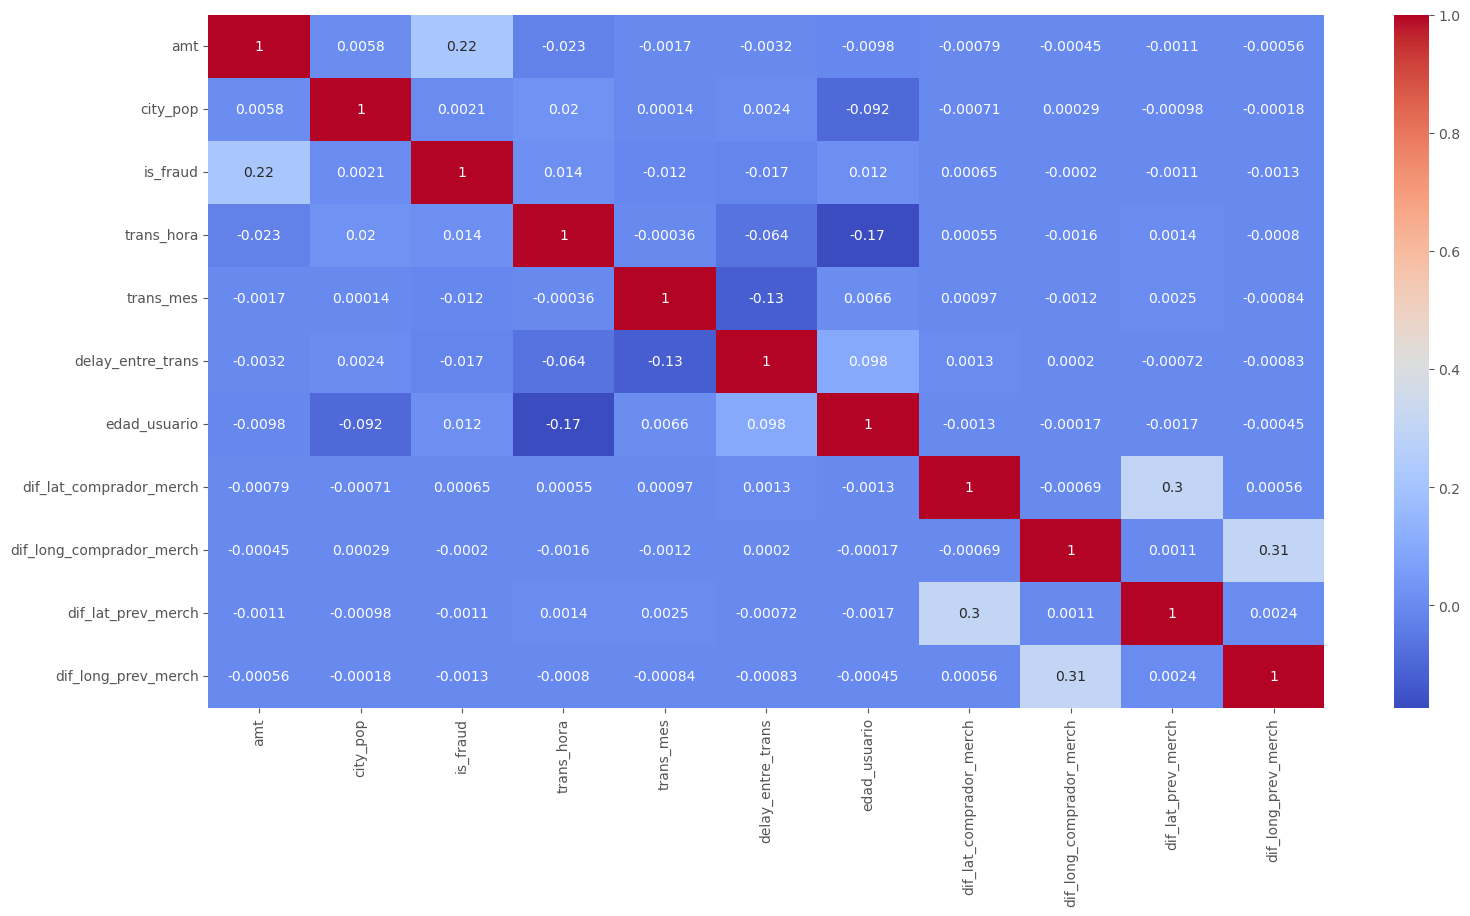

In [45]:
fig=plt.figure(figsize=(18,9))
sns.heatmap(total_trans.corr(),cmap='coolwarm',annot=True)
plt.show()

<p>Ahora eliminamos los dataframes copia que creamos al inicio del analisis.</p>

In [46]:
del total_trans
del normal
del fraudes

<h2>Preparacion de datos (2)</h2>
<ul>
    <li>Manejo de outliers: Manejo de valores atípicos mediante winsorizacion</li>
    <li>Codificación de variables categoricas: Codificacion mediante one-hot y codificación target</li>
    <li>Transformación de variables</li>
    <li>Escalado de features: escalar valores numericos para que estén en un rango similar</li>
</ul>

In [47]:
data.shape

(1296675, 15)

In [48]:
data.columns

Index(['category', 'amt', 'gender', 'state', 'city_pop', 'is_fraud',
       'trans_hora', 'trans_mes', 'trans_dia', 'delay_entre_trans',
       'edad_usuario', 'dif_lat_comprador_merch', 'dif_long_comprador_merch',
       'dif_lat_prev_merch', 'dif_long_prev_merch'],
      dtype='object')

<h3>Manejo de valores atípicos (outliers)</h3>

<p> Utilizaremos la libreria de Python feature_engine para el manejo de features puesto que lo hace mas rapido y provee herramientas para codificacion de variables categoricas y escalado de features.</p>
<p>Primero, tenemos que identificar las variables que tengas outliers y manejarlos.</p>

In [49]:
!pip install feature_engine 

In [50]:
#Buscamos las columnas numericas
col_numericas= data.select_dtypes(include=np.number).columns
col_numericas

Index(['amt', 'city_pop', 'is_fraud', 'trans_hora', 'trans_mes',
       'delay_entre_trans', 'edad_usuario', 'dif_lat_comprador_merch',
       'dif_long_comprador_merch', 'dif_lat_prev_merch',
       'dif_long_prev_merch'],
      dtype='object')

<p>Ahora vamos a detectar outliers utilizando como graficas para visualizarlas.</p>

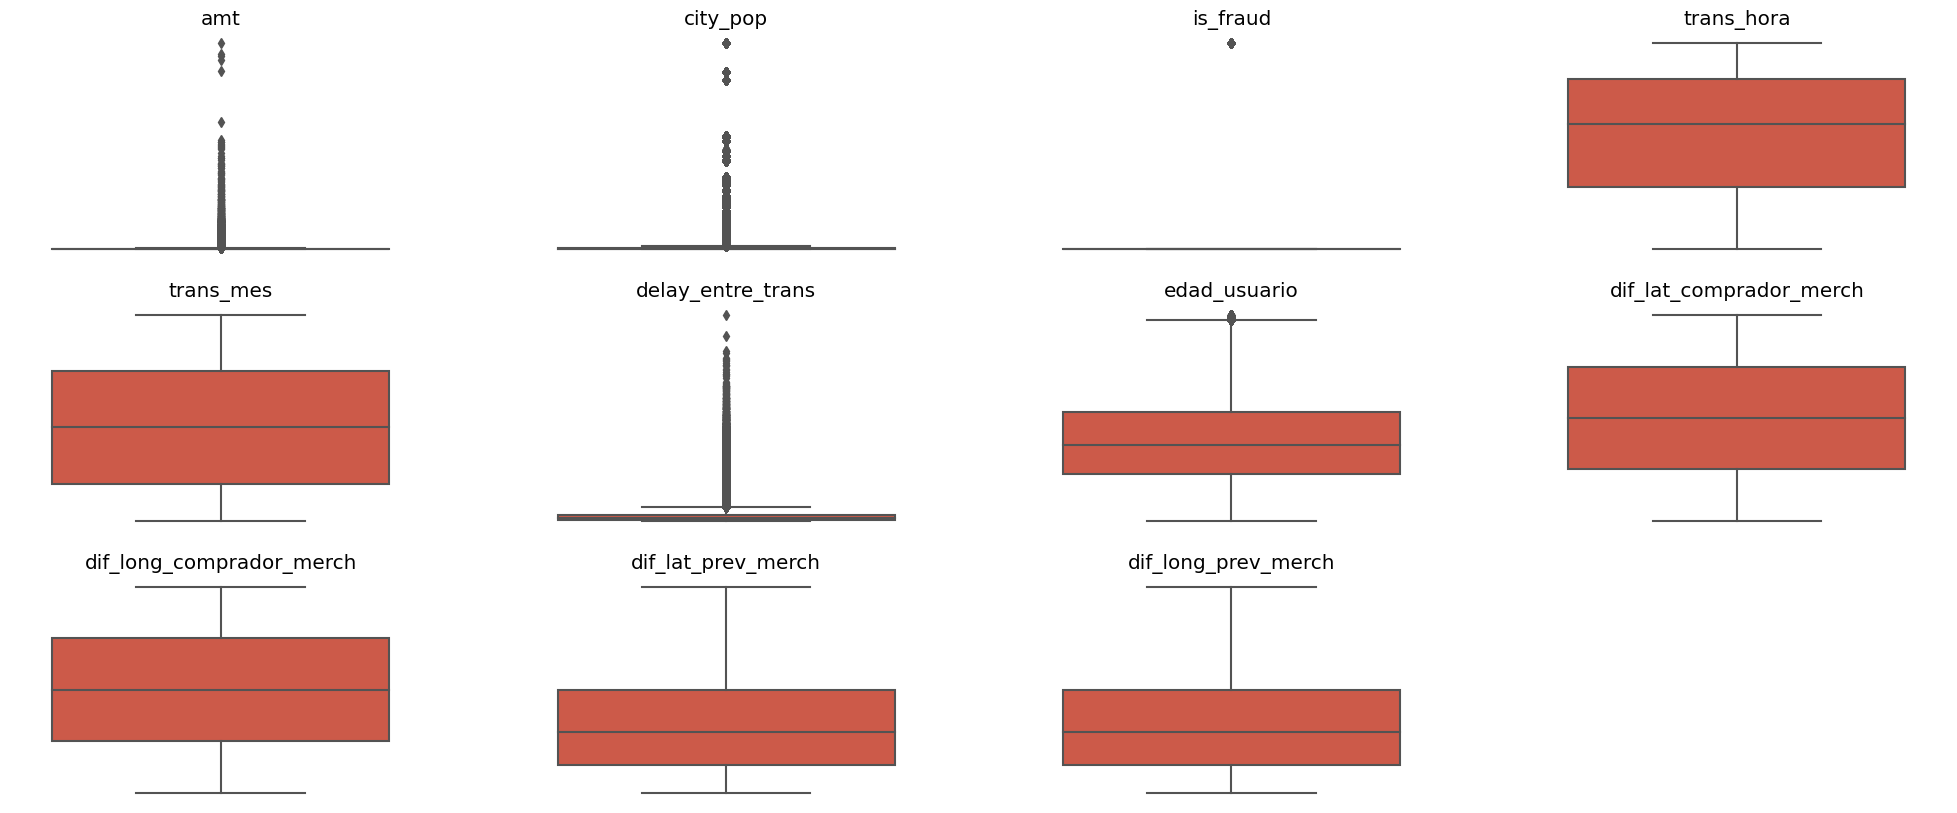

In [51]:
plt.figure(figsize=[25,10])

for indice, col_nombre in enumerate(col_numericas):
    plot_var=data[col_nombre]
    plt.subplot(3,4,indice+1)
    sns.boxplot(plot_var)
    plt.title(col_nombre)
    plt.axis(False)

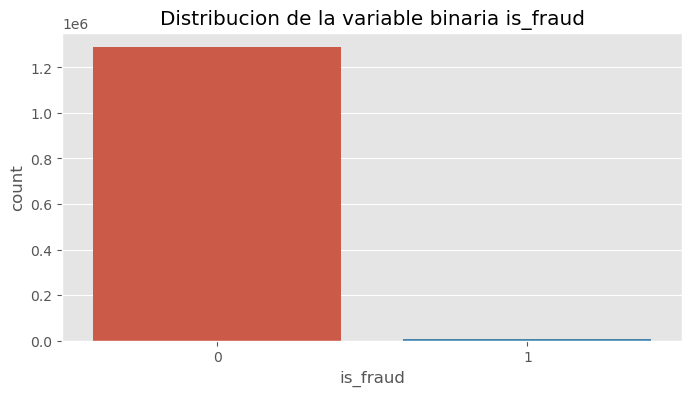

In [52]:
plt.figure(figsize=[8,4])

sns.countplot(x='is_fraud',data=data[['is_fraud']])
plt.title('Distribucion de la variable binaria is_fraud')
plt.show()


<p>Podemos observar que las variables 'amt', 'city_pop','delay_entre_trans','edad_usuario' tiene outliers que hay que manejar.</p>
<p>Como 'is_fraud' es nuestra variable de interes binaria, por lo que no hay valores 'atipicos', todos toman valores 0 o 1.</p>
<p>Para esto usaremos el winsorizacion mediante el metodo IQr.</p>
<p>Winsorizacion es un metodo para tratar valores atipicos que consiste en reemplazar los valores extremos con los valores más cercanos dentro de un rango definido. Preferimos consevarlos antes de eliminarlos puesto que podriamos perder información de un posible fraude.</p> 
<p>El metodo IQR es la utilización del rando intercuartil. Se define como la diferencia entre el tercer cuartil (q3) y el primer cuartil (q1) de los datos, es decir, iqr=q3 -q1. Hay que tener en cuenta que iqr es bueno puesto que es menos sensible a los valores atipicos.</p>

In [53]:
from feature_engine.outliers import Winsorizer

In [54]:
variables_a_manejar=['amt','city_pop','delay_entre_trans','edad_usuario']
capper_iqr=Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=variables_a_manejar)
#Ahora lo aplicamos a nuestro dataset
capper_iqr.fit(data)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'city_pop', 'delay_entre_trans', 'edad_usuario'])

In [55]:
#Ahora aplicamos a los valores a los datos
data=capper_iqr.transform(data)


<p>Verificamos ahora nuevamente las variables.</p>

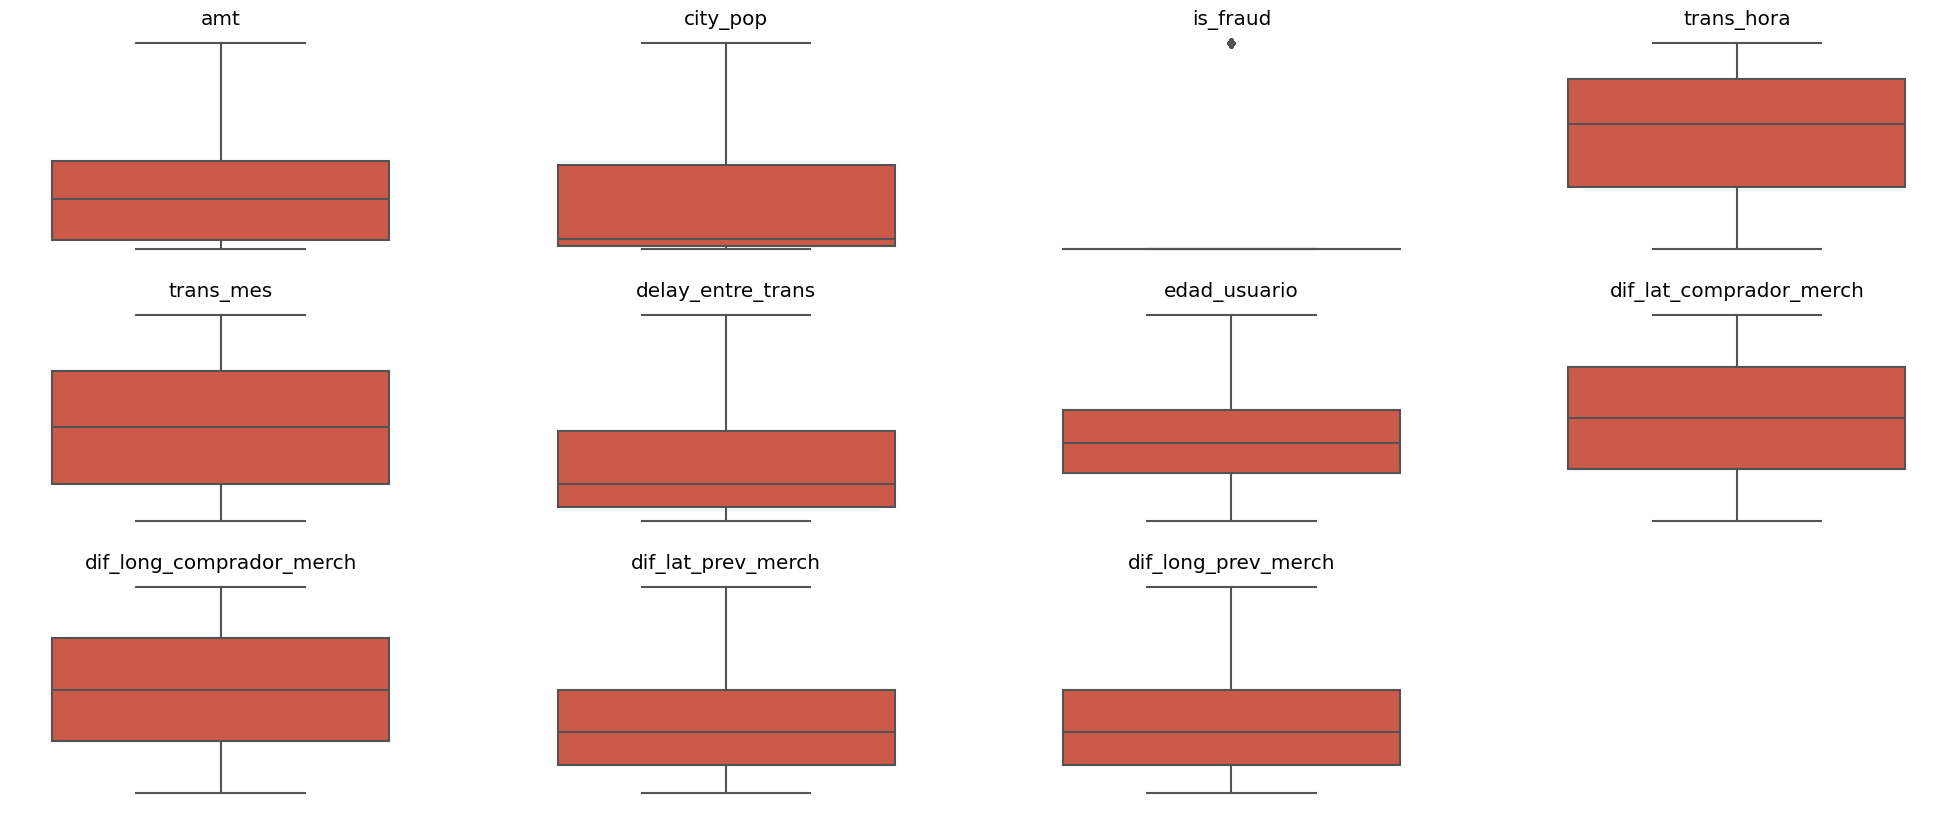

In [56]:
plt.figure(figsize=[25,10])

for indice, col_nombre in enumerate(col_numericas):
    plot_var=data[col_nombre]
    plt.subplot(3,4,indice+1)
    sns.boxplot(plot_var)
    plt.title(col_nombre)
    plt.axis(False)

<p>Ahora las variables tienen una buena distribución.</p>

<h3>Codificación de variables categoricas</h3>
<p>El objetivo es convertir las variables no numericas(categoricas) en variables numericas para poder usarlas durante la construccion de nuestro modelo.</p>

<p>Primero veamos las variables categoricas que tenemos.</p>

In [57]:
columnas_categoricas=data.select_dtypes(exclude=np.number).columns
data[columnas_categoricas].nunique()

category     14
gender        2
state        51
trans_dia     7
dtype: int64

<p>Podriamos deducir lo siguiente:</p>
<ul>
    <li>Para genero se utilizará one-hot-encoding debido a la cardinalidad</li>
    <li>Por otro lado, trans_dia, state y category se utilizara mean enconding (target encoding) para evaluar la media de fraude</li>
</ul>

In [58]:
#Primero realizamos onehotenconding para genero
from feature_engine.encoding import OneHotEncoder

In [59]:
codificador_onehot=OneHotEncoder(variables='gender',drop_last=True)
codificador_onehot.fit(data)

OneHotEncoder(drop_last=True, variables='gender')

In [60]:
#Transformamos la variable 'gender'
data=codificador_onehot.transform(data)


In [61]:
#Ahora realizamos mean encoding para category, state y trans_dia
from feature_engine.encoding import MeanEncoder


In [62]:
variables=['category','state','trans_dia']
codificador_mean=MeanEncoder(variables=variables)
codificador_mean.fit(data, data['is_fraud'])

MeanEncoder(variables=['category', 'state', 'trans_dia'])

In [63]:
codificador_mean.encoder_dict_

{'category': {'entertainment': 0.0024783542876592847,
  'food_dining': 0.0016509769191239982,
  'gas_transport': 0.004693944204346076,
  'grocery_net': 0.0029481650972454456,
  'grocery_pos': 0.014097607531665023,
  'health_fitness': 0.0015486905995645036,
  'home': 0.0016082524468992406,
  'kids_pets': 0.0021143893484319018,
  'misc_net': 0.014457945549638947,
  'misc_pos': 0.003138534931893792,
  'personal_care': 0.002424028735758831,
  'shopping_net': 0.017561485703740914,
  'shopping_pos': 0.007225383982446517,
  'travel': 0.0028637025699261858},
 'state': {'ak': 0.016981132075471698,
  'al': 0.005245309717241211,
  'ar': 0.00517235840267292,
  'az': 0.003435468895078923,
  'ca': 0.005784244144783534,
  'co': 0.00814121037463977,
  'ct': 0.002077382498052454,
  'dc': 0.005812344312205923,
  'de': 1.0,
  'fl': 0.006585268683649317,
  'ga': 0.005601810996431723,
  'hi': 0.0027354435326299334,
  'ia': 0.005262182694089309,
  'id': 0.0019837691614066726,
  'il': 0.005733838897623232,
 

In [64]:
data=codificador_mean.transform(data)

<p>Veamos los tipos de datos que tenemos</p>


In [65]:
data.dtypes

category                    float64
amt                         float64
state                       float64
city_pop                    float64
is_fraud                      int64
trans_hora                    int64
trans_mes                     int64
trans_dia                   float64
delay_entre_trans           float64
edad_usuario                float64
dif_lat_comprador_merch     float64
dif_long_comprador_merch    float64
dif_lat_prev_merch          float64
dif_long_prev_merch         float64
gender_f                      int32
dtype: object

<p>Ahora tenemos todos datos numéricos.</p>

<h3>Escalado de variables</h3>
<p>En esta etapa, buscamos normalizar o estandarizzar las variables numéricas a una escala común. La idea es que estén en un rango similar de valores puesto que los modelos puede ser sensibles a la escala de las variables</p>
<p>Si bien, random forest no necesita un escalado de las variables puesto que no toma en cuenta las distancias entre los datos, el escalado puede prevenir el sobreajuste (overfitting) del modelo.</p>
<p>Además, si se necesita modificar el modelo, tenemos la posibilidad de ya tener los datos escalados por si el modelo lo requiriera.</p>
    

<h4>Verificamos la asimetría de las variables</h4>

In [66]:
data.skew()

category                      1.165691
amt                           1.061963
state                       285.670958
city_pop                      1.188109
is_fraud                     13.029122
trans_hora                   -0.282825
trans_mes                     0.298516
trans_dia                    -0.012131
delay_entre_trans             1.157775
edad_usuario                  0.611148
dif_lat_comprador_merch      -0.001202
dif_long_comprador_merch     -0.001450
dif_lat_prev_merch            0.565637
dif_long_prev_merch           0.565088
gender_f                     -0.190655
dtype: float64

<p>Se puede observar que state tiene una gran simetria, probablemente debido a la diferencia entre la cantidad de transacciones fraudulentas por estado. Por lo tanto, vamos a manejar eso. </p>
<p>Para esto vamos a usar primero un metodo de transformacion para normalizar y luego escalarlo, esto debido a que si normalizamos primero los datos, esto mejoraria mejor el escalado.</p>

In [67]:
data.min()

category                     0.001549
amt                          1.000000
state                        0.001984
city_pop                    23.000000
is_fraud                     0.000000
trans_hora                   0.000000
trans_mes                    1.000000
trans_dia                    0.004648
delay_entre_trans            0.000000
edad_usuario                13.931868
dif_lat_comprador_merch      0.000000
dif_long_comprador_merch     0.000000
dif_lat_prev_merch           0.000000
dif_long_prev_merch          0.000000
gender_f                     0.000000
dtype: float64

<h4>Normalizado</h4>

<p>Dentro de las transformaciones, se selecciono YeoJohnson debido a que ya viene en el paquete de feature_engine y, además, puede trabajar con valores negativos y ceros.</p>

In [68]:
#importamos
from feature_engine.transformation import YeoJohnsonTransformer

In [69]:
#Creamos el transformador
yj_transformer=YeoJohnsonTransformer(variables='state')

In [70]:
#Lo ajustamos a nuestros datos
yj_transformer.fit(data)

YeoJohnsonTransformer(variables='state')

In [71]:
#Ahora transformamos nuestro dataset
data=yj_transformer.transform(data)

<h4>Escalado</h4>

<p>Dentro de los metodos de escalado hay muchos tipos, se usará robust.scaler </p>
<ul>
    <li>Robustex a los valores atipicos: Es resistente a los outliers</li>
    <li>Conserva la forma de distribucion: no cambia la distribucion original de los datos</li>
    <li>Escalado en un rango intercuartil: Escala los datos en un rango intercuartil, lo que lo hace mas adecuado para datos que no están normalmente distribuidos y que pueden tener valores extremos. </li>
</ul>


In [72]:
#Primero veamos que columnas tenemos , vamos a estandarizar todo menos nuestra targed variable
columnas_a_estandarizar=data.columns
columnas_a_estandarizar

Index(['category', 'amt', 'state', 'city_pop', 'is_fraud', 'trans_hora',
       'trans_mes', 'trans_dia', 'delay_entre_trans', 'edad_usuario',
       'dif_lat_comprador_merch', 'dif_long_comprador_merch',
       'dif_lat_prev_merch', 'dif_long_prev_merch', 'gender_f'],
      dtype='object')

In [73]:
from sklearn.preprocessing import RobustScaler

In [74]:
scaler=RobustScaler()

In [75]:
scaler.fit(data)

RobustScaler()

In [76]:
data=pd.DataFrame(data=scaler.transform(data),columns=columnas_a_estandarizar)

In [77]:
data.skew()

category                     1.165691
amt                          1.061963
state                       -0.315369
city_pop                     1.188109
is_fraud                    13.029122
trans_hora                  -0.282825
trans_mes                    0.298516
trans_dia                   -0.012131
delay_entre_trans            1.157775
edad_usuario                 0.611148
dif_lat_comprador_merch     -0.001202
dif_long_comprador_merch    -0.001450
dif_lat_prev_merch           0.565637
dif_long_prev_merch          0.565088
gender_f                    -0.190655
dtype: float64

In [78]:
data.count()

category                    1296675
amt                         1296675
state                       1296675
city_pop                    1296675
is_fraud                    1296675
trans_hora                  1296675
trans_mes                   1296675
trans_dia                   1296675
delay_entre_trans           1296675
edad_usuario                1296675
dif_lat_comprador_merch     1296675
dif_long_comprador_merch    1296675
dif_lat_prev_merch          1296675
dif_long_prev_merch         1296675
gender_f                    1296675
dtype: int64

<h2>Division de dataset</h2>
   

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
#Dividimos nuestro dataset
X=data[['category', 'amt', 'state', 'city_pop', 'trans_hora',
       'trans_mes', 'trans_dia', 'delay_entre_trans', 'edad_usuario',
       'dif_lat_comprador_merch', 'dif_long_comprador_merch',
       'dif_lat_prev_merch', 'dif_long_prev_merch', 'gender_f']]
X_train, X_test, y_train, y_test= train_test_split(X, data['is_fraud'],test_size=0.30)

<p>Veamos ahora la distribucion que poseen. </p>

In [81]:
#Concatenamos la variables y la variable objetivo, para analizar
train_set=pd.concat([X_train,y_train],axis=1)
train_set.shape

(907672, 15)

In [82]:
#Separamos la clase mayoritaria(=0/legitima) y la minoritaria(=1/fraudulentas)
fraudes=train_set[train_set['is_fraud']==1]
no_fraudes=train_set[train_set['is_fraud']==0]

In [83]:
print('Primero la distribución de nuestro trainset','\n')
print('El X_train tiene {} casos'.format(X_train.shape[0]),'\n')
print('El y_train tiene {} casos'.format(y_train.shape[0]),'\n')
print('Ahora en porcentajes','\n')
print(y_train.value_counts(normalize=True)*100,'\n')
print('hay {} cantidad de casos legitimos.'.format(no_fraudes.shape[0]))
print('Hay {} cantidad de casos fraudes.'.format(fraudes.shape[0]))

Primero la distribución de nuestro trainset 

El X_train tiene 907672 casos 

El y_train tiene 907672 casos 

Ahora en porcentajes 

0.0    99.424241
1.0     0.575759
Name: is_fraud, dtype: float64 

hay 902446 cantidad de casos legitimos.
Hay 5226 cantidad de casos fraudes.


<p>Como se puede observar el trainset esta muy desbalanceado.</p>
<p>Para balancearlo vamos a utilizar el metodo SMOTE (Synthetic Minority Oversampling Technique) en el cual se hace oversampling sobre la parte minoritaria generando muestras sintéticas y no copias de los datos.</p>
<p>Algunos beneficios de Smote son:</p>
<ul>
    <li>Ayuda al desbalanceo.</li>
    <li>Reduce el sobreajuste (overfitting) a nuestro modelo</li>
</ul>

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
#Creamos el objeto SMOTE
sm= SMOTE(random_state=42, sampling_strategy=1.0)

In [86]:
X_train_resampled,y_train_resampled=sm.fit_resample(X_train,y_train)

In [87]:
train_set_resampled=pd.concat([X_train_resampled,y_train_resampled],axis=1)
#separamos los fraudes de los legitimos en el resampled
fraudes_resampled=train_set_resampled[train_set_resampled['is_fraud']==1]
no_fraudes_resampled=train_set_resampled[train_set_resampled['is_fraud']==0]

In [88]:
#Ahora verificamos los trainsets balanceados
print('Primero la distribución de nuestro trainset','\n')
print('El X_train_resamppled tiene {} casos'.format(X_train_resampled.shape[0]),'\n')
print('El y_train_resampled tiene {} casos'.format(y_train_resampled.shape[0]),'\n')
print('Ahora en porcentajes','\n')
print(y_train_resampled.value_counts(normalize=True)*100,'\n')
print('hay {} cantidad de casos legitimos.'.format(no_fraudes_resampled.shape[0]))
print('Hay {} cantidad de casos fraudes.'.format(fraudes_resampled.shape[0]))

Primero la distribución de nuestro trainset 

El X_train_resamppled tiene 1804892 casos 

El y_train_resampled tiene 1804892 casos 

Ahora en porcentajes 

0.0    50.0
1.0    50.0
Name: is_fraud, dtype: float64 

hay 902446 cantidad de casos legitimos.
Hay 902446 cantidad de casos fraudes.


<h2>Construccion del modelo</h2>

<h3>Metricas de medicion</h3>
<p>Se decidio usar roc-auc debido al contexto de negocio, esto ya que tenemos que tener en cuenta:</p>
<ul>
    <li>Los true-positives, es decir, los fraudes</li>
    <li>Los true-negatives, es decir, las legitimas, esto por la experiencia de usuario, podria pasar que al usuario no le guste que le tomen una transaccion legitima como fraulenta cuando no lo es.</li>
</ul>
<p>Por otro lado, tambien tenemos en cuenta que este es solo una primera barrera para la deteccion de fraudes.</p>

In [89]:
#importamos lo necesario para este proceso
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [90]:
ruta_guardar_data_test='C:/Users/Freyja/Desktop/Datasets/dataset_test_x_limpios.csv'
X_test.to_csv(ruta_guardar_data_test,index=False)

In [91]:
print('La cantidad guardada es un csv de {} filas y {} columnas.'.format(X_test.shape[0],X_test.shape[1]))

La cantidad guardada es un csv de 389003 filas y 14 columnas.


In [92]:
#Guardaremos los test set concatenados
test_set=pd.concat([X_test,y_test],axis=1)
test_set.shape

(389003, 15)

In [93]:
ruta_guardar_testset_completo='C:/Users/Freyja/Desktop/Datasets/dataset_test_completo_limpios.csv'
test_set.to_csv(ruta_guardar_testset_completo,index=False)

<h4>Primer modelo</h4>

In [94]:
#Modelo 1, parametros simples
rfc_1= RandomForestClassifier(n_estimators=100)

In [95]:
#Ajustamos el modelo a nuestros datos resampled
%time rfc_1.fit(X_train_resampled,y_train_resampled)

CPU times: total: 11min 38s
Wall time: 11min 39s


RandomForestClassifier()

<p>Definamos una funciones para mostrar los datos de evaluacion obtenidos</p>

In [96]:
def mostrar_matrix(y_true,y_pred):
    conf_matrix=confusion_matrix(y_true,y_pred)
    conf_matrix_porcentajes=confusion_matrix(y_true,y_pred,normalize='true')
    nombre_clases=['No-Fraude','Fraude']
    mapa=sns.heatmap(conf_matrix,annot=True,fmt='.2f', cmap='Blues',xticklabels=nombre_clases,yticklabels=nombre_clases)

    #agregar porcentajes
    for i in range(2):
        for j in range(2):
            #Obtenemos los valores y formateamos como porcentaje
            valor=conf_matrix[i,j]
            porcentaje=round(conf_matrix_porcentajes[i,j]*100,2)
            #añadimos anotacion con valor y porcentaje
            mapa.annotate(f'{valor}({porcentaje}%)',xy=(j+0.5,i+0.6),ha='center', va='center')

    mapa.set_xlabel("Pedicho")
    mapa.set_ylabel("Real")
    mapa.set_title("Matriz de confusión")
    plt.show()

In [97]:
def mostrar_scores(y_true,y_pred):
    print("ROC AUC Score: ", roc_auc_score(y_true,y_pred),'\n')
    print("Precision Score: ", precision_score(y_true,y_pred),'\n')
    print("Recall Score: ", recall_score(y_true,y_pred),'\n')
    print("F1 Score: ", f1_score(y_true,y_pred),'\n')
    print("Accuracy Score: ", accuracy_score(y_true,y_pred))


In [98]:
def evaluar(modelo):
    y_predict=modelo.predict(X_test)
    mostrar_scores(y_test,y_predict)
    print('------------------------------------','\n')
    mostrar_matrix(y_test,y_predict)

ROC AUC Score:  0.8598894059717525 

Precision Score:  0.8357070193285859 

Recall Score:  0.7206140350877193 

F1 Score:  0.7739048516250588 

Accuracy Score:  0.9975321527083338
------------------------------------ 



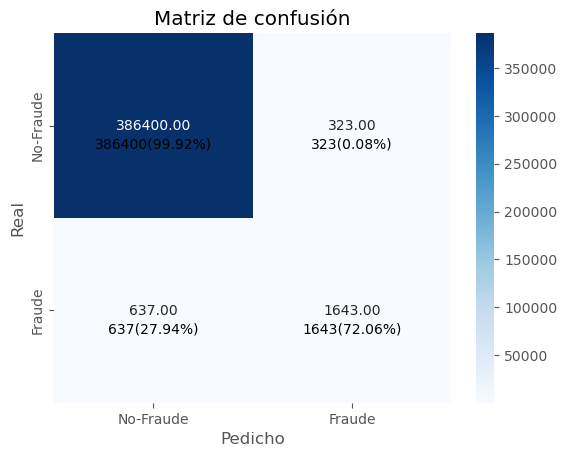

CPU times: total: 4.92 s
Wall time: 4.9 s


In [99]:
%time evaluar(rfc_1)

<h4>Segundo modelo</h4>
<p>Modificacion manual de parametros.</p>
<ul>
    <li>n_estimators: número de arboles que se utilizan en el modelo. Aumentar este parámetro puede mejorar la precisión del modelo, pero también aumenta el costo computacional.</li>
    <li>criterion: la función de medida de calidad utilizada para dividir los nodos del árbol. Los valores disponibles son 'gini' para el índice de impureza de Gini y 'entropy' para la ganancia de información.</li>
    <li>max_depth: la profundidad maxima permitida del árbol. Un árbol más profundo puede capturar mejor las interacciones entre las variables, pero también puede sobreajustar los datos.</li>
    <li>min_samples_split: el número mínimo de muestras requeridas para dividir un nodo. Aumentar este valor puede reducir el sobreajuste, pero también puede hacer que el modelo sea menos sensible a las características importantes.</li>
    <li>min_samples_leaf: el número minimo de muestras requeridas en un hoja. Aumentar este valor puede reducir el sobreajuste, pero también puede hacer que el modelo sea menos sensible a las características importantes.</li>
    <li>max_features: el número máximo de características que se deben considerar al buscar la mejor división. Reducir este valor puede hacer que el modelo sea menos sensible al ruido en los datos.</li>
    <li>class_weight: parametro opcional que especifica los epsos de clase para ajustar su desequilibro.</li>
</ul>

In [100]:
#Construimos el modelo 2 modificando la distribucion de los pesos y max_depth
rfc_2= RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,n_jobs=-1, class_weight='balanced')

In [101]:
#Ajustamos el modelo a nuestros datos resampled
%time rfc_2.fit(X_train_resampled,y_train_resampled)

CPU times: total: 13min 18s
Wall time: 1min 13s


RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

ROC AUC Score:  0.9301250121862918 

Precision Score:  0.16003795366490076 

Recall Score:  0.887719298245614 

F1 Score:  0.2711864406779661 

Accuracy Score:  0.972033634702046
------------------------------------ 



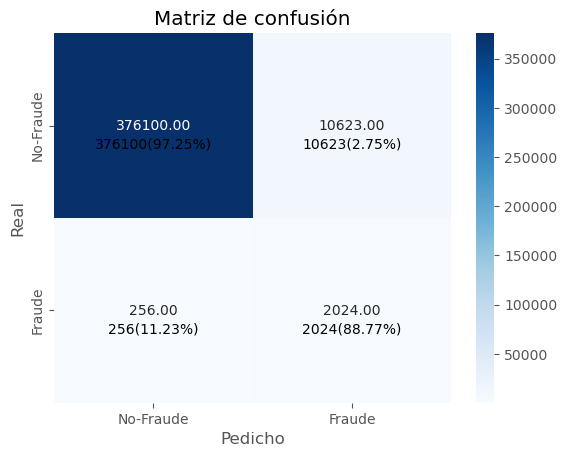

CPU times: total: 4.86 s
Wall time: 1.26 s


In [102]:
#evaluamos el segundo modelo
%time evaluar(rfc_2)

<h4>Tercer modelo</h4>

In [103]:
#creamos el tercer modelo
rfc_3=RandomForestClassifier(n_estimators=100, max_depth=10,
                             min_samples_split=75,min_samples_leaf=10, random_state=42, n_jobs=-1)

In [104]:
#Entrenamos el modelo
%time rfc_3.fit(X_train_resampled,y_train_resampled)

CPU times: total: 13min 11s
Wall time: 1min 11s


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=75,
                       n_jobs=-1, random_state=42)

ROC AUC Score:  0.93061771207017 

Precision Score:  0.15466117844347893 

Recall Score:  0.8899122807017544 

F1 Score:  0.26352360542892395 

Accuracy Score:  0.9708459831929317
------------------------------------ 



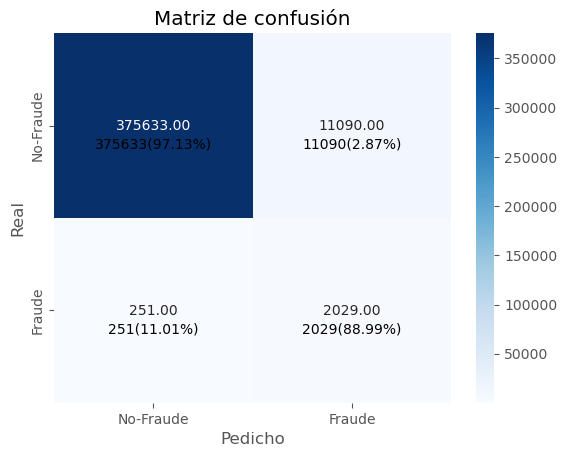

CPU times: total: 4.75 s
Wall time: 1.3 s


In [105]:
#Evaluamos el modelo
%time evaluar(rfc_3)

<h4>Implementacion de Parameter Tuning</h4>

<p>En este caso se utilizará la tecnica de cross-valitation y ajuste de hiperparametros para mejorar la calidad del modelo.</p>
<p>En el caso de la validación cruzada, consiste en una técnica para evaluar la capacidad predictiva del modelo utilizando unn subconjunto de datos de entrenamiento.</p>
<p>Por otro lado, el ajuste de hiperparametros implica seleccionar los valores óptimos de los hiperparámetros del modelo. Dichos parametros son lso que no se aprenden directamente del conjunto de datos, como lo es la cantidad de arboles de un random forest.</p>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold</p>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html</p>

In [106]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [107]:
#Vamos a hacer una copia de nuestros train sets y test sets para el manejo de parametros
param_train_x=X_train_resampled
param_train_y=y_train_resampled

param_test_x=X_test
param_test_y=y_test

In [108]:
#Creamos el cv
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [109]:
#Hyperparametros de rfc
parametros={
    'n_estimators':[100,200,300,500],
    'max_depth':[5,10,20,25],
    'min_samples_split':[10,20,30,50,75,100],
    'min_samples_leaf':[10,20,30,50,75],
    'max_features':['sqrt','log2',10],
}

<h4>Modelo 1</h4>

In [110]:
#Definiendo el objeto de busqueda y ajustamos a la muestra 

search=HalvingRandomSearchCV(estimator= rfc_1, param_distributions= parametros, cv=skf, scoring='roc_auc',
                           refit=True,n_jobs=-1,random_state=42)

%time search.fit(param_train_x,param_train_y)

CPU times: total: 1h 11min 46s
Wall time: 1h 19min 26s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(), n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20, 25],
                                           'max_features': ['sqrt', 'log2', 10],
                                           'min_samples_leaf': [10, 20, 30, 50,
                                                                75],
                                           'min_samples_split': [10, 20, 30, 50,
                                                                 75, 100],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

In [111]:
#Buscando los mejores parametros
mejores_parametros=search.best_params_
mejores_parametros

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 10,
 'max_depth': 10}

In [112]:
#Ahora construyamos un modelo con dichos parametros
rfc_1.set_params(n_estimators=300,min_samples_split=10,min_samples_leaf=10,max_features=10,max_depth=10)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=300)

In [113]:
#Ajustamos nuestros datos al primer modelo
%time rfc_1.fit(X_train_resampled,y_train_resampled)

CPU times: total: 1h 11min 11s
Wall time: 1h 11min 15s


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=300)

ROC AUC Score:  0.9505666926202356 

Precision Score:  0.2217290213485521 

Recall Score:  0.9201754385964912 

F1 Score:  0.3573496848918413 

Accuracy Score:  0.9806016920177993
------------------------------------ 



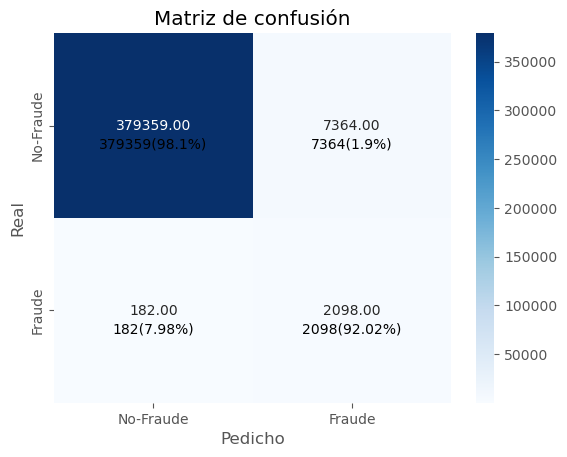

CPU times: total: 8.48 s
Wall time: 8.47 s


In [115]:
#veamos los resultados
%time evaluar(rfc_1)

<h5>Exportacion del modelo 1</h5>

In [116]:
import pickle

In [117]:
ruta_archivo1='C:/Users/Freyja/Desktop/Modelos/modelo1_entrenado.pkl'

In [118]:
#Guardamos el modelo entrenado en un archivo pkl
with open(ruta_archivo1,'wb') as f:
    pickle.dump(rfc_1,f)

<h4>Modelo 2</h4>

In [119]:
#Definiendo el objeto de busqueda y ajustamos a la muestra
search2= HalvingRandomSearchCV(estimator=rfc_2,param_distributions=parametros,cv=skf,scoring='roc_auc',
                              refit=True,n_jobs=-1,random_state=42)
%time search2.fit(param_train_x,param_train_y)

CPU times: total: 1h 49min 13s
Wall time: 19min 35s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10, n_jobs=-1,
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20, 25],
                                           'max_features': ['sqrt', 'log2', 10],
                                           'min_samples_leaf': [10, 20, 30, 50,
                                                                75],
                                           'min_samples_split': [10, 20, 30, 50,
                                                                 75, 100],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

In [125]:
#Buscando los mejores parametros
mejores_parametros2=search2.best_params_
mejores_parametros2

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 10,
 'max_depth': 10}

In [126]:
#Ahora construyamos el modelo con dichos parametros
rfc_2.set_params(**mejores_parametros2)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [127]:
#Ajustamos nuestros datos al segundo modelo
%time rfc_2.fit(X_train_resampled,y_train_resampled)

CPU times: total: 1h 48min 11s
Wall time: 9min 30s


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

ROC AUC Score:  0.9507140849398029 

Precision Score:  0.22443303380402224 

Recall Score:  0.9201754385964912 

F1 Score:  0.3608531131750946 

Accuracy Score:  0.9808947488836847
------------------------------------ 



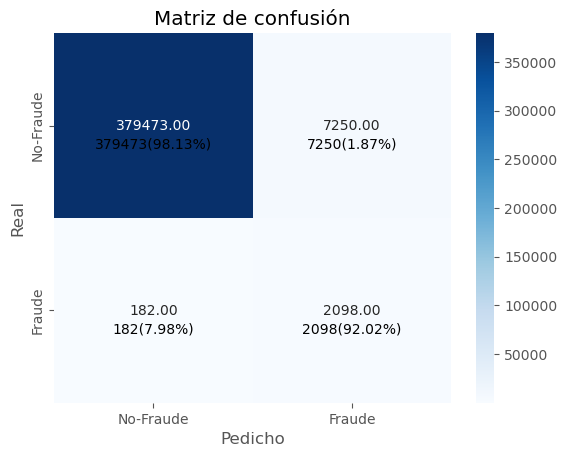

CPU times: total: 12.4 s
Wall time: 2.01 s


In [128]:
#evaluamos el segundo modelo
%time evaluar(rfc_2)

<h5>Exportacion del modelo 2</h5>

In [129]:
ruta_archivo2='C:/Users/Freyja/Desktop/Modelos/modelo2_entrenado.pkl'

In [130]:
#Guardamos el modelo entrenado en un archivo pkl
with open(ruta_archivo2,'wb') as f:
    pickle.dump(rfc_2,f)

<h4>Modelo 3</h4>

In [131]:
#Definiendo el objeto de busqueda y ajustamos a la muestra
search3= HalvingRandomSearchCV(estimator=rfc_3,param_distributions=parametros,cv=skf,scoring='roc_auc',refit=True, n_jobs=-1,
                             random_state=42)
%time search3.fit(param_train_x,param_train_y)

CPU times: total: 3h 36s
Wall time: 25min 41s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=10,
                                                       min_samples_split=75,
                                                       n_jobs=-1,
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20, 25],
                                           'max_features': ['sqrt', 'log2', 10],
                                           'min_samples_leaf': [10, 20, 30, 50,
                                                                75],
                                           'min_samples_split': [10, 20, 30, 50,
                                                                 75, 100],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

In [132]:
#Buscando los mejores parametros
mejores_parametros3=search3.best_params_
mejores_parametros3

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 10,
 'max_depth': 10}

In [133]:
#Ahora setiemos el modelo con los parametros
rfc_3.set_params(**mejores_parametros3)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [134]:
#Ajustamos nuestros datos al 3er modelo
%time rfc_3.fit(X_train_resampled,y_train_resampled)

CPU times: total: 3h 10s
Wall time: 15min 36s


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

ROC AUC Score:  0.9499635976355714 

Precision Score:  0.22647631408176508 

Recall Score:  0.9184210526315789 

F1 Score:  0.3633524206142634 

Accuracy Score:  0.981136392264327
------------------------------------ 



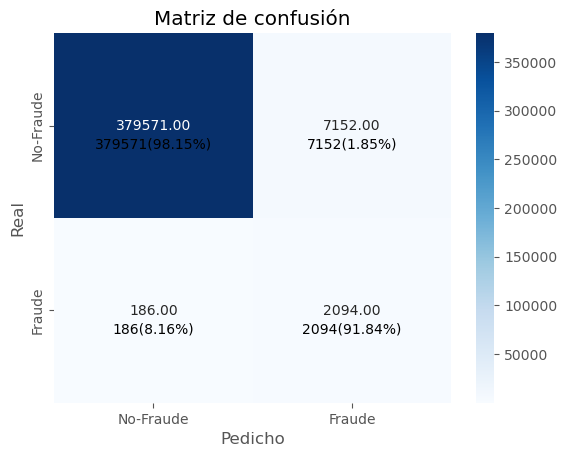

CPU times: total: 20.6 s
Wall time: 2.78 s


In [135]:
#evaluamos el 3er modelo
%time evaluar(rfc_3)

<h5>Exportacion del modelo 3</h5>

In [136]:
ruta_archivo3='C:/Users/Freyja/Desktop/Modelos/modelo3_entrenado.pkl'

In [137]:
#Guardamos el modelo entrenado en un archivo pkl
with open(ruta_archivo3,'wb') as f:
    pickle.dump(rfc_3,f)

<h2>Interpretacion del modelo</h2>
<p>De los 6 modelos ejecutados, se selecciono el rfc_2 parametrizado. Entonces ahora se intentará encontrar las caracteristicas importantes y realizar un pequeño análisis para entender como funciona.</p>

In [138]:
feature_scores=pd.Series(rfc_2.feature_importances_,index=X_train_resampled.columns).sort_values(ascending=False)
feature_scores

amt                         0.648320
trans_hora                  0.170575
category                    0.124302
edad_usuario                0.018782
delay_entre_trans           0.018360
gender_f                    0.008015
city_pop                    0.004297
trans_mes                   0.002161
state                       0.001999
trans_dia                   0.001742
dif_lat_prev_merch          0.000564
dif_lat_comprador_merch     0.000308
dif_long_prev_merch         0.000306
dif_long_comprador_merch    0.000269
dtype: float64

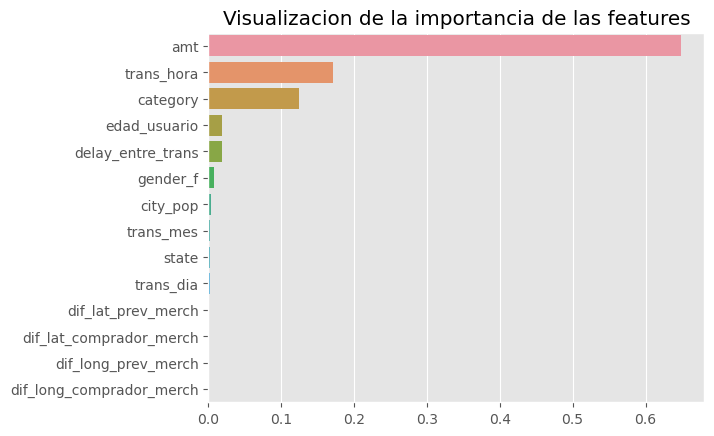

In [144]:
#Tratemos de visualizar las features en un grafico
sns.barplot(x=feature_scores,y=feature_scores.index)

plt.title('Visualizacion de la importancia de las features')

plt.show()

<p>Se puede observar que la cantidad del monto de transaccion y la hora de transaccion tiene mucho impacto en la clasificacion de los casos.</p>
<p>Esto tambien se pudo observar en el análisis previo respecto a los mapas de calor y las gráficas.</p>

<h4>Descarga para observacion de un arbol del rfc_2 para muestra</h4>
<p>Se descargara la imagen de uno de los arboles para observacion de muestra</p>

In [159]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [170]:
#Visualizacion del random forest 2 parametrizado
#Extraccion de un solo arbol
estimator=rfc_2.estimators_[5]

import graphviz
export_graphviz(estimator,out_file='tree.dot',feature_names=X_train_resampled.columns,class_names=['0','1'],filled=True,
                             rounded=True, special_characters=True)
#graph=graphviz.Source(dot_data)
#graph
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])

0